In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../../dataset/First Experiment/Turkish/Turkish(SKG_ARN).xlsx")
df = pd.DataFrame(data)

In [4]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,09:45:00,10:35:00,0,7,1,1,1,220,225.09
1,09:45:00,16:30:00,0,7,1,1,0,110,298.09
2,09:45:00,16:30:00,1,1,1,1,0,110,196.09
3,09:45:00,16:30:00,2,2,1,1,0,220,196.09
4,09:45:00,10:35:00,2,2,1,1,1,110,196.09


In [5]:
for i in df.columns:
  print(i,"\t\t-\t", df[i].isna().mean()*100)

departure_time 		-	 0.0
arrival_time 		-	 0.0
days_before 		-	 0.0
day_of_week 		-	 0.0
num_of_luggage 		-	 0.0
num_of_stops 		-	 0.0
overnight_flight 		-	 0.0
Class 		-	 0.0
price 		-	 0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
departure_time      1128 non-null object
arrival_time        1128 non-null object
days_before         1128 non-null int64
day_of_week         1128 non-null int64
num_of_luggage      1128 non-null int64
num_of_stops        1128 non-null int64
overnight_flight    1128 non-null int64
Class               1128 non-null int64
price               1128 non-null float64
dtypes: float64(1), int64(6), object(2)
memory usage: 79.4+ KB


In [7]:
df.shape

(1128, 9)

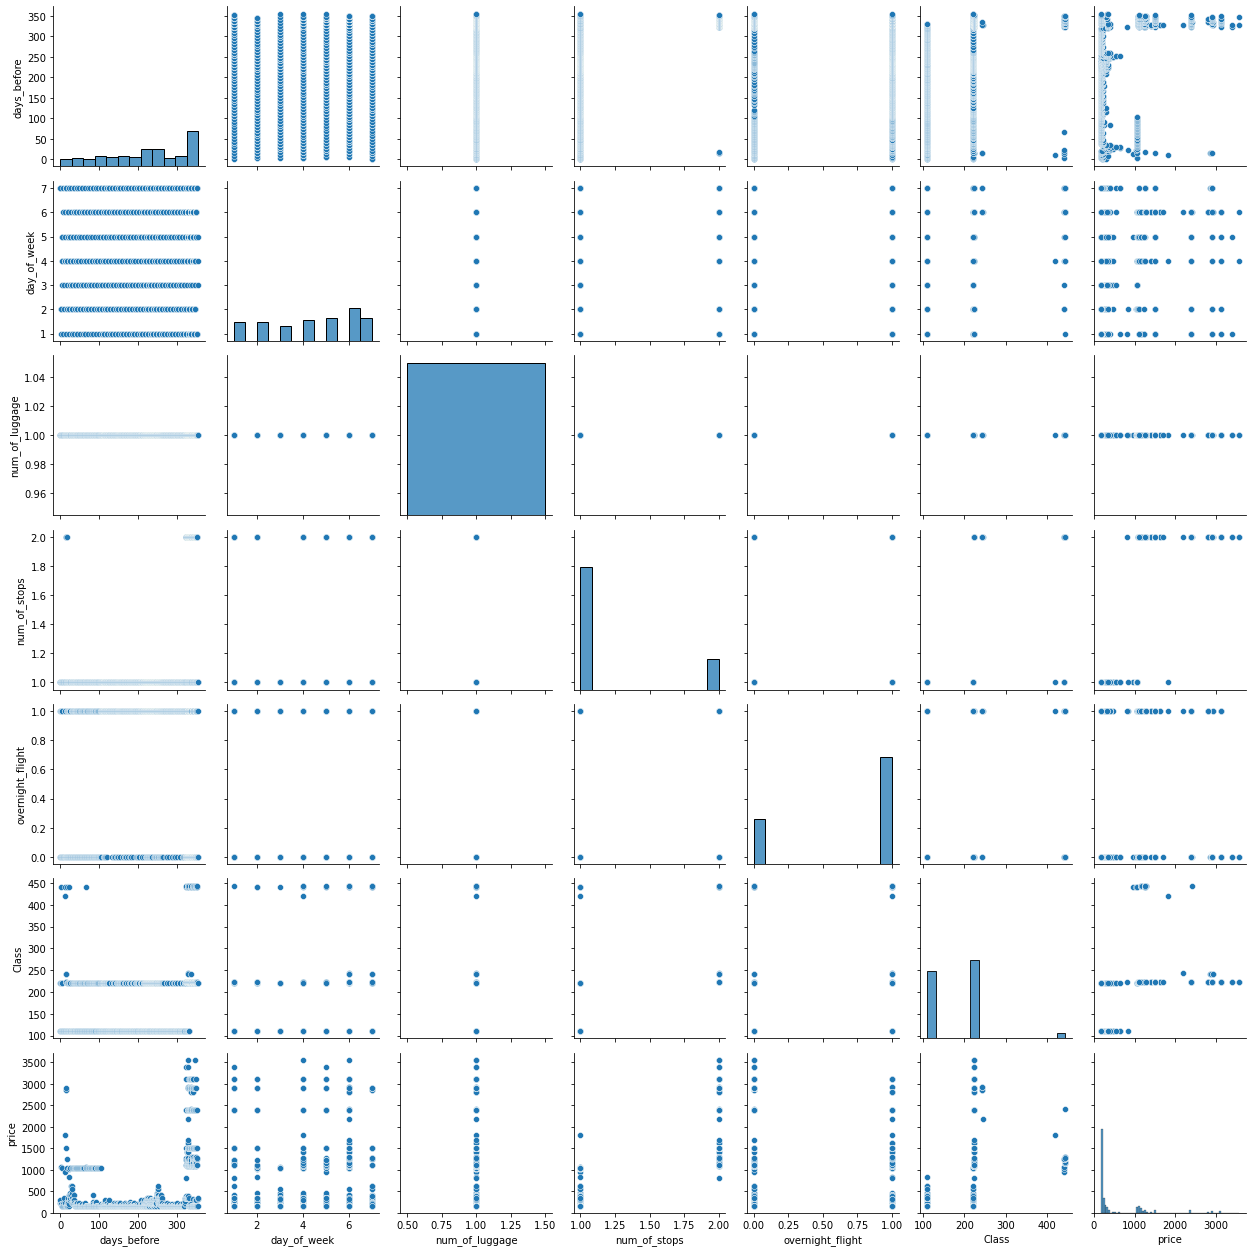

In [8]:
sns.pairplot(df)
plt.tight_layout()

In [9]:
df['departure_time'] = pd.to_datetime(df['departure_time'], format='%H:%M:%S')

In [10]:
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')

In [11]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,1900-01-01 09:45:00,1900-01-01 10:35:00,0,7,1,1,1,220,225.09
1,1900-01-01 09:45:00,1900-01-01 16:30:00,0,7,1,1,0,110,298.09
2,1900-01-01 09:45:00,1900-01-01 16:30:00,1,1,1,1,0,110,196.09
3,1900-01-01 09:45:00,1900-01-01 16:30:00,2,2,1,1,0,220,196.09
4,1900-01-01 09:45:00,1900-01-01 10:35:00,2,2,1,1,1,110,196.09


In [12]:
df['departuretime'] = pd.to_datetime(df['departure_time']).astype(np.int64)

In [13]:
df['arrivaltime'] = pd.to_datetime(df['arrival_time']).astype(np.int64)

In [14]:
df.head()

,departure_time,arrival_time,days_before,day_of_week,num_of_luggage,num_of_stops,overnight_flight,Class,price,departuretime,arrivaltime
0,1900-01-01 09:45:00,1900-01-01 10:35:00,0,7,1,1,1,220,225.09,-2208953700000000000,-2208950700000000000
1,1900-01-01 09:45:00,1900-01-01 16:30:00,0,7,1,1,0,110,298.09,-2208953700000000000,-2208929400000000000
2,1900-01-01 09:45:00,1900-01-01 16:30:00,1,1,1,1,0,110,196.09,-2208953700000000000,-2208929400000000000
3,1900-01-01 09:45:00,1900-01-01 16:30:00,2,2,1,1,0,220,196.09,-2208953700000000000,-2208929400000000000
4,1900-01-01 09:45:00,1900-01-01 10:35:00,2,2,1,1,1,110,196.09,-2208953700000000000,-2208950700000000000


In [15]:
df.columns

Index(['departure_time', 'arrival_time', 'days_before', 'day_of_week',
       'num_of_luggage', 'num_of_stops', 'overnight_flight', 'Class', 'price',
       'departuretime', 'arrivaltime'],
      dtype='object')

In [16]:
df = df[['departuretime','arrivaltime','day_of_week', 'days_before','num_of_luggage', 'num_of_stops', 'overnight_flight','Class','price']]

In [17]:
del df['departuretime']

In [18]:
del df['arrivaltime']

In [19]:
#df = df.apply(np.int64)

In [20]:
df.head()

,day_of_week,days_before,num_of_luggage,num_of_stops,overnight_flight,Class,price
0,7,0,1,1,1,220,225.09
1,7,0,1,1,0,110,298.09
2,1,1,1,1,0,110,196.09
3,2,2,1,1,0,220,196.09
4,2,2,1,1,1,110,196.09


In [21]:
df.to_csv('skg_arn_proc.csv')

In [22]:
X = df.drop(['price'], axis=1)
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

In [55]:
ML_Model = []
accuracy = []

#function to call for storing the results
def storeResults(model, a):
    ML_Model.append(model)
    accuracy.append(round(a, 3))

# AdaBoost

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

In [26]:
from sklearn.ensemble import AdaBoostRegressor
search_grid={'n_estimators':[5000,10000,20000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
adr = AdaBoostRegressor()
search=GridSearchCV(estimator=adr,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
search.fit(X_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [5000, 10000, 20000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [27]:
y_pred = search.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.7934535731847112


In [56]:
ab_sc = r2_score(y_test, y_pred)
storeResults('AdaBoost',ab_sc)

# Bagging Regressor

In [28]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

clf = BaggingRegressor(DecisionTreeRegressor(),n_estimators=10000, random_state=0)

clf.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10000,
                 random_state=0)

In [29]:
y_pred = clf.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8726385546632058


In [57]:
bag_sc = r2_score(y_test, y_pred)
storeResults('Bagging',bag_sc)

# Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10000, random_state=0)

gbr.fit(X_train,y_train)

y_pred = gbr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.875995496942519


In [58]:
gb_sc = r2_score(y_test, y_pred)
storeResults('Gradient Boosting',gb_sc)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8762242054919507


In [59]:
dt_sc = r2_score(y_test, y_pred)
storeResults('Decision Tree',dt_sc)

# RAndom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

rfr = RandomForestRegressor(max_depth=2, random_state=0)

grid_forest = GridSearchCV(rfr,param_grid=param_grid)

grid_forest.fit(X_train,y_train)

y_pred = grid_forest.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8124608642468731


In [60]:
rf_sc = r2_score(y_test, y_pred)
storeResults('Random Forest',rf_sc)

# Extra Tree

In [33]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=10000, random_state=0)

etr.fit(X_train,y_train)

y_pred = etr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.8762226971534524


In [61]:
et_sc = r2_score(y_test, y_pred)
storeResults('Extra Tree',et_sc)

# SVR

In [34]:
from sklearn.svm import SVR

sr = SVR(C=1.0, epsilon=0.2)

sr.fit(X_train,y_train)

y_pred = sr.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: -0.14218049861746884


In [62]:
svr_sc = r2_score(y_test, y_pred)
storeResults('SVR',svr_sc)

# MLP

In [35]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=1, max_iter=500)
mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred)))

Accuracy score of the predictions: 0.49754445913504697


In [63]:
mlp_sc = r2_score(y_test, y_pred)
storeResults('MLP',mlp_sc)

# DL

In [36]:
X_train = np.array(X).reshape(X.shape[0], X.shape[1], 1)
X_test = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [37]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Create 2 virtual GPUs with 1GB memory each
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=1024),
         tf.config.LogicalDeviceConfiguration(memory_limit=1024)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPU,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPU, 2 Logical GPUs


In [38]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

# VGG11

In [39]:
def vgg11():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [40]:
model = vgg11()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 6, 128)            41088     
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                38450     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [41]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 3s 9ms/step - loss: 162344.6250 - val_loss: 1743885.0000
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 119733.1562 - val_loss: 1625527.6250
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 121517.4844 - val_loss: 2008784.6250
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 118654.0781 - val_loss: 1772527.8750
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 114061.4922 - val_loss: 1737483.5000
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 110493.7578 - val_loss: 1665753.6250
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 111367.2656 - val_loss: 1663952.2500
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 110540.5234 - val_loss: 1733176.7500
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 109397.6797 - val_loss: 1800887.0000
Epoch 10/2

29/29 [==============================] - 0s 4ms/step - loss: 91531.7812 - val_loss: 929644.1875
Epoch 76/200
29/29 [==============================] - 0s 4ms/step - loss: 87707.7109 - val_loss: 992711.3125
Epoch 77/200
29/29 [==============================] - 0s 4ms/step - loss: 87194.7031 - val_loss: 1131488.8750
Epoch 78/200
29/29 [==============================] - 0s 4ms/step - loss: 81800.6406 - val_loss: 985806.8750
Epoch 79/200
29/29 [==============================] - 0s 4ms/step - loss: 81367.3984 - val_loss: 1337151.3750
Epoch 80/200
29/29 [==============================] - 0s 4ms/step - loss: 80975.2891 - val_loss: 1180255.5000
Epoch 81/200
29/29 [==============================] - 0s 5ms/step - loss: 87881.1406 - val_loss: 1054162.8750
Epoch 82/200
29/29 [==============================] - 0s 5ms/step - loss: 82734.3125 - val_loss: 1368581.0000
Epoch 83/200
29/29 [==============================] - 0s 4ms/step - loss: 80392.6719 - val_loss: 1117349.7500
Epoch 84/200
29/29 [======

In [42]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.4483605264050461


In [64]:
vgg_sc = r2_score(y, y_pred)
storeResults('VGG11',vgg_sc)

# VGG13

In [43]:
def vgg13():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
model = vgg13()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [45]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 174764.6094 - val_loss: 1818855.7500
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 127497.9141 - val_loss: 1720466.1250
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 117605.4922 - val_loss: 1643158.7500
Epoch 4/200
29/29 [==============================] - ETA: 0s - loss: 118381.18 - 0s 5ms/step - loss: 115180.0078 - val_loss: 1811700.5000
Epoch 5/200
29/29 [==============================] - 0s 5ms/step - loss: 118409.0078 - val_loss: 1813857.8750
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 115570.6406 - val_loss: 1865255.6250
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 112805.9219 - val_loss: 1835912.7500
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 110367.6562 - val_loss: 1751859.2500
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 110224.5156 - val_

Epoch 75/200
29/29 [==============================] - 0s 4ms/step - loss: 89387.2734 - val_loss: 1103638.5000
Epoch 76/200
29/29 [==============================] - 0s 5ms/step - loss: 88319.2109 - val_loss: 1529802.7500
Epoch 77/200
29/29 [==============================] - 0s 5ms/step - loss: 92024.4375 - val_loss: 1494873.8750
Epoch 78/200
29/29 [==============================] - 0s 5ms/step - loss: 85176.2891 - val_loss: 937175.8125
Epoch 79/200
29/29 [==============================] - 0s 5ms/step - loss: 88818.4766 - val_loss: 1510821.1250
Epoch 80/200
29/29 [==============================] - 0s 5ms/step - loss: 101937.9922 - val_loss: 1463878.5000
Epoch 81/200
29/29 [==============================] - 0s 4ms/step - loss: 93441.9766 - val_loss: 1152755.8750
Epoch 82/200
29/29 [==============================] - 0s 4ms/step - loss: 93758.9297 - val_loss: 1409298.7500
Epoch 83/200
29/29 [==============================] - 0s 5ms/step - loss: 86460.1484 - val_loss: 1101673.0000
Epoch 84/2

In [46]:
y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Accuracy score of the predictions: 0.599734057227922


In [65]:
vgg1_sc = r2_score(y, y_pred)
storeResults('VGG13',vgg1_sc)

# ResNet18

In [47]:
def resnet18():
    
    model = Sequential()
    
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(64, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet18()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 16)             64        
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 6, 32)             1568      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 6, 64)             10304     
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                19250     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [48]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 0s 8ms/step - loss: 160157.0000 - val_loss: 1825440.2500
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 126882.2500 - val_loss: 1982848.6250
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 118709.2500 - val_loss: 1762332.5000
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 114821.5156 - val_loss: 1616935.1250
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 115407.1484 - val_loss: 1837395.5000
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 113180.3203 - val_loss: 1756895.3750
Epoch 7/200
29/29 [==============================] - 0s 5ms/step - loss: 110983.6484 - val_loss: 1787554.8750
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 110111.9453 - val_loss: 1698995.6250
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 110646.7656 - val_loss: 1598562.5000
Epoch 10/2

29/29 [==============================] - 0s 4ms/step - loss: 55095.4141 - val_loss: 700242.6875
Epoch 150/200
29/29 [==============================] - 0s 4ms/step - loss: 52030.9492 - val_loss: 998732.0625
Epoch 151/200
29/29 [==============================] - 0s 5ms/step - loss: 56909.4844 - val_loss: 635443.5625
Epoch 152/200
29/29 [==============================] - 0s 4ms/step - loss: 51991.5977 - val_loss: 580284.4375
Epoch 153/200
29/29 [==============================] - 0s 4ms/step - loss: 54632.1328 - val_loss: 745318.7500
Epoch 154/200
29/29 [==============================] - 0s 4ms/step - loss: 51657.0234 - val_loss: 590721.3750
Epoch 155/200
29/29 [==============================] - 0s 4ms/step - loss: 50115.8242 - val_loss: 883666.2500
Epoch 156/200
29/29 [==============================] - 0s 4ms/step - loss: 49530.8594 - val_loss: 584885.5625
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 52653.6406 - val_loss: 605347.2500
Epoch 158/200
29/29 [===

In [66]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet18',res18_sc)

# ResNet34

In [49]:
def resnet34():
    
    model = Sequential()
    
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(516, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = resnet34()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            24704     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 6, 516)            330756    
_________________________________________________________________
flatten_3 (Flatten)          (None, 3096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                154850    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [50]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 1s 11ms/step - loss: 143301.6094 - val_loss: 1683521.8750
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 119117.0078 - val_loss: 1845097.2500
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 109891.0859 - val_loss: 1816831.3750
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 114223.9922 - val_loss: 1702401.3750
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 122602.6484 - val_loss: 2201622.5000
Epoch 6/200
29/29 [==============================] - 0s 5ms/step - loss: 115101.2734 - val_loss: 1780609.5000
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 110115.1719 - val_loss: 1635637.3750
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 113036.0234 - val_loss: 1652400.8750
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 110986.8281 - val_loss: 1781140.6250
Epoch 10/

Epoch 150/200
29/29 [==============================] - 0s 5ms/step - loss: 37620.3008 - val_loss: 531862.0000
Epoch 151/200
29/29 [==============================] - 0s 4ms/step - loss: 37185.8633 - val_loss: 467360.8125
Epoch 152/200
29/29 [==============================] - 0s 5ms/step - loss: 36604.1562 - val_loss: 468419.7500
Epoch 153/200
29/29 [==============================] - 0s 5ms/step - loss: 41254.1602 - val_loss: 450290.2188
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 37238.6250 - val_loss: 496193.8750
Epoch 155/200
29/29 [==============================] - 0s 5ms/step - loss: 35837.6523 - val_loss: 464322.3125
Epoch 156/200
29/29 [==============================] - 0s 5ms/step - loss: 36565.8008 - val_loss: 523967.9688
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 35939.9883 - val_loss: 485074.6875
Epoch 158/200
29/29 [==============================] - 0s 5ms/step - loss: 34173.3789 - val_loss: 470104.9688
Epoch 159/

In [67]:
res18_sc = r2_score(y, y_pred)
storeResults('ResNet34',res18_sc)

# MobileNetv1

In [51]:
def mobilenetv1():
    
    model = Sequential()
    
    model.add(Conv1D(8, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(16, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(32, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv1()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 6, 8)              32        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 6, 16)             400       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 6, 32)             2592      
_________________________________________________________________
flatten_4 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                9650      
_________________________________________________________________
dense_13 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [52]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 1s 10ms/step - loss: 163198.7188 - val_loss: 1576682.5000
Epoch 2/200
29/29 [==============================] - 0s 5ms/step - loss: 128861.9297 - val_loss: 1721294.2500
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 120966.7969 - val_loss: 1626258.1250
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 118718.4375 - val_loss: 1598336.3750
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 118168.0391 - val_loss: 1829659.5000
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 115984.0469 - val_loss: 1737351.1250
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 114544.3203 - val_loss: 1788671.7500
Epoch 8/200
29/29 [==============================] - 0s 5ms/step - loss: 114877.4219 - val_loss: 1825299.8750
Epoch 9/200
29/29 [==============================] - 0s 5ms/step - loss: 112965.0469 - val_loss: 1715933.0000
Epoch 10/

29/29 [==============================] - 0s 4ms/step - loss: 82497.7266 - val_loss: 982016.5625
Epoch 150/200
29/29 [==============================] - 0s 4ms/step - loss: 78821.5625 - val_loss: 1452356.8750
Epoch 151/200
29/29 [==============================] - 0s 4ms/step - loss: 80888.6562 - val_loss: 1351750.7500
Epoch 152/200
29/29 [==============================] - 0s 4ms/step - loss: 76942.5156 - val_loss: 788190.4375
Epoch 153/200
29/29 [==============================] - 0s 5ms/step - loss: 79689.8516 - val_loss: 1149078.3750
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 77222.2734 - val_loss: 801946.0625
Epoch 155/200
29/29 [==============================] - 0s 5ms/step - loss: 87261.1016 - val_loss: 826247.8750
Epoch 156/200
29/29 [==============================] - 0s 4ms/step - loss: 78495.8828 - val_loss: 1035347.6250
Epoch 157/200
29/29 [==============================] - 0s 5ms/step - loss: 76216.7188 - val_loss: 1074122.3750
Epoch 158/200
29/29

In [68]:
mob1_sc = r2_score(y, y_pred)
storeResults('MobileNetV1',mob1_sc)

# MobileNetV2

In [53]:
def mobilenetv2():
    
    model = Sequential()
    
    model.add(Conv1D(128, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(516, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(1024, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())   
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

model = mobilenetv2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 6, 128)            512       
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 6, 516)            198660    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 6, 1024)           2642944   
_________________________________________________________________
flatten_5 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                307250    
_________________________________________________________________
dense_16 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [54]:
model.fit(X_train, y, epochs=200, validation_split=0.2)

y_pred = model.predict(X_test)
print("Accuracy score of the predictions: {0}".format(r2_score(y, y_pred)))

Epoch 1/200
29/29 [==============================] - 1s 11ms/step - loss: 140661.7188 - val_loss: 1602211.2500
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 117848.0391 - val_loss: 1853428.3750
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 114774.0938 - val_loss: 1719850.6250
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 120020.2109 - val_loss: 1556953.3750
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 117228.8438 - val_loss: 1781944.8750
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 116164.1875 - val_loss: 1723189.7500
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 111897.7969 - val_loss: 1811256.1250
Epoch 8/200
29/29 [==============================] - 0s 4ms/step - loss: 118002.8984 - val_loss: 1877988.5000
Epoch 9/200
29/29 [==============================] - 0s 4ms/step - loss: 114807.2109 - val_loss: 1803333.1250
Epoch 10/

Epoch 150/200
29/29 [==============================] - 0s 5ms/step - loss: 35892.3516 - val_loss: 468384.5938
Epoch 151/200
29/29 [==============================] - 0s 5ms/step - loss: 34205.4883 - val_loss: 446253.7500
Epoch 152/200
29/29 [==============================] - 0s 4ms/step - loss: 36749.5156 - val_loss: 458366.0625
Epoch 153/200
29/29 [==============================] - 0s 4ms/step - loss: 33962.8320 - val_loss: 459807.5625
Epoch 154/200
29/29 [==============================] - 0s 5ms/step - loss: 34118.4727 - val_loss: 449184.9062
Epoch 155/200
29/29 [==============================] - 0s 4ms/step - loss: 35374.9258 - val_loss: 519014.8438
Epoch 156/200
29/29 [==============================] - 0s 5ms/step - loss: 32993.1445 - val_loss: 435142.9688
Epoch 157/200
29/29 [==============================] - 0s 4ms/step - loss: 33963.2070 - val_loss: 441692.5938
Epoch 158/200
29/29 [==============================] - 0s 4ms/step - loss: 32573.4785 - val_loss: 446302.3125
Epoch 159/

In [69]:
mob2_sc = r2_score(y, y_pred)
storeResults('MobileNetV2',mob2_sc)

# Comparison

In [70]:
#creating dataframe
import pandas as pd
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'R2-Score' : accuracy,
                      })

In [71]:
result

,ML Model,R2-Score
0,AdaBoost,0.793
1,Bagging,0.876
2,Gradient Boosting,0.876
3,Decision Tree,0.876
4,Random Forest,0.812
5,Extra Tree,0.876
6,SVR,0.140
7,MLP,0.497
8,VGG11,0.448
9,VGG13,0.600


# Graph

In [72]:
import numpy as np
classifier = ML_Model
y_pos = np.arange(len(classifier))

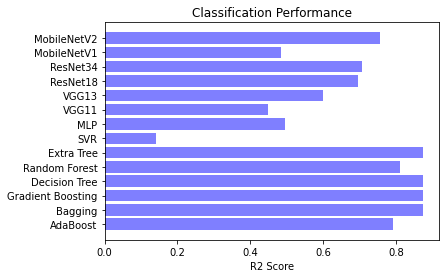

In [73]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Classification Performance')
plt2.show()